In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# 读取数据并查看数据

In [2]:
data_train = pd.read_csv('./dataset/train.csv', index_col=0)
data_test = pd.read_csv('./dataset/test.csv', index_col=0)

In [3]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 分离特征和标签， 并且将训练集与测试集合并以便于处理

In [5]:
data_y = data_train.SalePrice
data_y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
data_train2 = data_train.drop('SalePrice', axis=1)
data_train2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**查看训练集和测试集的大小，方便以后分离**

In [7]:
data_train2.shape, data_test.shape

((1460, 79), (1459, 79))

In [8]:
data_all = pd.concat([data_train2, data_test])
data_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
data_all.shape

(2919, 79)

# 分析并处理数据

## 查看数据的类型

> 将不符合比赛文档数据类型的数据进行修改

In [10]:
# 设置显示所有的行和列
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [11]:
pd.DataFrame(data_all.dtypes).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object


**根据说明文件可知， MSSubClass应该是离散型的分类数据， 不是int类型， OverallQual， OverallCond也不是， 那么就需要将其转换为object类型**

In [12]:
data_all.MSSubClass = data_all.MSSubClass.astype('object')
data_all.OverallQual = data_all.OverallQual.astype('object')
data_all.OverallCond = data_all.OverallCond.astype('object')

In [13]:
pd.DataFrame(data_all.dtypes).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,object,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object


## 查看是否存在缺失值

In [14]:
data_all.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

**由以上数据可以发现Alley， PoolQC，Fence， MiscFeature缺失值过多， 因此可以直接删除, FireplaceQu有一半是缺失值， 也可以删除**

In [15]:
new_data_all = data_all.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

In [16]:
new_data_all.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

### 查看数值型数据的缺失值情况

In [17]:
object_data = new_data_all.select_dtypes(include=['object'])
object_data.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [18]:
no_obejct_data = new_data_all.select_dtypes(include=['int64', 'float64'])
no_obejct_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [19]:
new_data_all.shape, object_data.shape, no_obejct_data.shape

((2919, 74), (2919, 41), (2919, 33))

#### 查看并处理数值型数据缺失值

In [20]:
no_obejct_data.isnull().sum()

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [21]:
no_obejct_data.isnull().sum().sum()

678

**使用均值进行填充**

In [22]:
no_obejct_data_no_null = no_obejct_data.fillna(no_obejct_data.mean())
no_obejct_data_no_null.isnull().any()

LotFrontage      False
LotArea          False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

#### 对非数值型数据进行缺失值处理（使用最多的进行填充）

In [23]:
object_data.isnull().sum()

MSSubClass         0
MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [24]:
# 获取每一列的最多的值并转换为pd.Series
object_data_Series = pd.Series(object_data.mode().to_numpy().reshape(-1))
object_data_Series

0          20
1          RL
2        Pave
3         Reg
4         Lvl
5      AllPub
6      Inside
7         Gtl
8       NAmes
9        Norm
10       Norm
11       1Fam
12     1Story
13          5
14          5
15      Gable
16    CompShg
17    VinylSd
18    VinylSd
19       None
20         TA
21         TA
22      PConc
23         TA
24         TA
25         No
26        Unf
27        Unf
28       GasA
29         Ex
30          Y
31      SBrkr
32         TA
33        Typ
34     Attchd
35        Unf
36         TA
37         TA
38          Y
39         WD
40     Normal
dtype: object

In [25]:
# 修改索引
object_data_Series.index = object_data.columns
object_data_Series

MSSubClass            20
MSZoning              RL
Street              Pave
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            5
OverallCond            5
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA
PavedDrive             Y
SaleType              WD


In [26]:
# 填充缺失值
object_data_no_null = object_data.fillna(object_data_Series)
object_data_no_null.isnull().sum().sum()

0

### 对数值型数据进行标准化处理

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
no_obejct_data_no_null_scaler = pd.DataFrame(scaler.fit_transform(no_obejct_data_no_null))

In [28]:
no_obejct_data_no_null_scaler.columns = no_obejct_data_no_null.columns
no_obejct_data_no_null_scaler.index = no_obejct_data_no_null.index
no_obejct_data_no_null_scaler.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.202068,-0.217879,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,-0.444328,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,0.986849,-0.924311,1.000929,0.306528,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
2,0.501870,-0.072044,0.154764,-0.395604,-0.572250,1.178112,-0.29313,-0.629896,0.477111,0.261075,-0.785025,-0.101197,-0.471891,-0.819679,3.822419,0.781366,-0.756321,0.169927,-0.207698,-0.287758,0.623632,-0.085000,0.306528,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
3,-0.061280,0.137197,0.980221,0.848965,0.334828,0.097873,-0.29313,-0.288516,-0.299076,-0.610718,1.235375,-0.101197,0.563755,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,-0.287758,0.623632,0.920490,0.306528,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
4,-0.436714,-0.078385,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,-0.047275,-0.671283,-0.506205,0.978742,-0.101197,0.427382,1.087023,-0.249895,-1.027363,-0.756321,0.169927,-0.207698,0.349546,0.623632,0.799831,1.619961,0.785457,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
5,0.689587,0.518903,0.947203,0.753229,1.387486,0.468931,-0.29313,-0.161068,0.211573,-0.037170,1.671651,-0.101197,1.378042,1.087023,-0.249895,0.781366,1.232599,1.385655,-0.207698,1.624153,0.623632,0.880270,1.619961,1.686437,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646


### 对非数值型数据进行one-hot编码

In [29]:
object_data_no_null.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### 将非数值型数据转换为数值型数据， 以便进行one-hot编码

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
new_object_data_no_null = pd.DataFrame(ordinal.fit_transform(object_data_no_null))

In [31]:
new_object_data_no_null.columns = object_data_no_null.columns
new_object_data_no_null.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,5.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,0.0,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,5.0,7.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,0.0,1.0,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,5.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,6.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,6.0,4.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,5.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,5.0,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,7.0,4.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


#### 对其进行onehot编码

In [32]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
object_data_one_hot = pd.DataFrame(onehot.fit_transform(new_object_data_no_null).toarray())

In [33]:
object_data_one_hot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [34]:
onehot.get_feature_names()

array(['x0_0.0', 'x0_1.0', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0',
       'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0',
       'x0_12.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x1_0.0', 'x1_1.0',
       'x1_2.0', 'x1_3.0', 'x1_4.0', 'x2_0.0', 'x2_1.0', 'x3_0.0',
       'x3_1.0', 'x3_2.0', 'x3_3.0', 'x4_0.0', 'x4_1.0', 'x4_2.0',
       'x4_3.0', 'x5_0.0', 'x5_1.0', 'x6_0.0', 'x6_1.0', 'x6_2.0',
       'x6_3.0', 'x6_4.0', 'x7_0.0', 'x7_1.0', 'x7_2.0', 'x8_0.0',
       'x8_1.0', 'x8_2.0', 'x8_3.0', 'x8_4.0', 'x8_5.0', 'x8_6.0',
       'x8_7.0', 'x8_8.0', 'x8_9.0', 'x8_10.0', 'x8_11.0', 'x8_12.0',
       'x8_13.0', 'x8_14.0', 'x8_15.0', 'x8_16.0', 'x8_17.0', 'x8_18.0',
       'x8_19.0', 'x8_20.0', 'x8_21.0', 'x8_22.0', 'x8_23.0', 'x8_24.0',
       'x9_0.0', 'x9_1.0', 'x9_2.0', 'x9_3.0', 'x9_4.0', 'x9_5.0',
       'x9_6.0', 'x9_7.0', 'x9_8.0', 'x10_0.0', 'x10_1.0', 'x10_2.0',
       'x10_3.0', 'x10_4.0', 'x10_5.0', 'x10_6.0', 'x10_7.0', 'x11_0.0',
       'x11_1.0', 'x11_2.0', 'x1

In [35]:
object_data_one_hot.columns = onehot.get_feature_names()
object_data_one_hot.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_7.0,x0_8.0,x0_9.0,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x2_0.0,x2_1.0,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x5_0.0,x5_1.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0,x7_0.0,x7_1.0,x7_2.0,x8_0.0,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_7.0,x8_8.0,x8_9.0,x8_10.0,x8_11.0,x8_12.0,x8_13.0,x8_14.0,x8_15.0,x8_16.0,x8_17.0,x8_18.0,x8_19.0,x8_20.0,x8_21.0,x8_22.0,x8_23.0,x8_24.0,x9_0.0,x9_1.0,x9_2.0,x9_3.0,x9_4.0,x9_5.0,x9_6.0,x9_7.0,x9_8.0,x10_0.0,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x10_6.0,x10_7.0,x11_0.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x12_0.0,x12_1.0,x12_2.0,x12_3.0,x12_4.0,x12_5.0,x12_6.0,x12_7.0,x13_0.0,x13_1.0,x13_2.0,x13_3.0,x13_4.0,x13_5.0,x13_6.0,x13_7.0,x13_8.0,x13_9.0,x14_0.0,x14_1.0,x14_2.0,x14_3.0,x14_4.0,x14_5.0,x14_6.0,x14_7.0,x14_8.0,x15_0.0,x15_1.0,x15_2.0,x15_3.0,x15_4.0,x15_5.0,x16_0.0,x16_1.0,x16_2.0,x16_3.0,x16_4.0,x16_5.0,x16_6.0,x16_7.0,x17_0.0,x17_1.0,x17_2.0,x17_3.0,x17_4.0,x17_5.0,x17_6.0,x17_7.0,x17_8.0,x17_9.0,x17_10.0,x17_11.0,x17_12.0,x17_13.0,x17_14.0,x18_0.0,x18_1.0,x18_2.0,x18_3.0,x18_4.0,x18_5.0,x18_6.0,x18_7.0,x18_8.0,x18_9.0,x18_10.0,x18_11.0,x18_12.0,x18_13.0,x18_14.0,x18_15.0,x19_0.0,x19_1.0,x19_2.0,x19_3.0,x20_0.0,x20_1.0,x20_2.0,x20_3.0,x21_0.0,x21_1.0,x21_2.0,x21_3.0,x21_4.0,x22_0.0,x22_1.0,x22_2.0,x22_3.0,x22_4.0,x22_5.0,x23_0.0,x23_1.0,x23_2.0,x23_3.0,x24_0.0,x24_1.0,x24_2.0,x24_3.0,x25_0.0,x25_1.0,x25_2.0,x25_3.0,x26_0.0,x26_1.0,x26_2.0,x26_3.0,x26_4.0,x26_5.0,x27_0.0,x27_1.0,x27_2.0,x27_3.0,x27_4.0,x27_5.0,x28_0.0,x28_1.0,x28_2.0,x28_3.0,x28_4.0,x28_5.0,x29_0.0,x29_1.0,x29_2.0,x29_3.0,x29_4.0,x30_0.0,x30_1.0,x31_0.0,x31_1.0,x31_2.0,x31_3.0,x31_4.0,x32_0.0,x32_1.0,x32_2.0,x32_3.0,x33_0.0,x33_1.0,x33_2.0,x33_3.0,x33_4.0,x33_5.0,x33_6.0,x34_0.0,x34_1.0,x34_2.0,x34_3.0,x34_4.0,x34_5.0,x35_0.0,x35_1.0,x35_2.0,x36_0.0,x36_1.0,x36_2.0,x36_3.0,x36_4.0,x37_0.0,x37_1.0,x37_2.0,x37_3.0,x37_4.0,x38_0.0,x38_1.0,x38_2.0,x39_0.0,x39_1.0,x39_2.0,x39_3.0,x39_4.0,x39_5.0,x39_6.0,x39_7.0,x39_8.0,x40_0.0,x40_1.0,x40_2.0,x40_3.0,x40_4.0,x40_5.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [36]:
object_data_one_hot.index = object_data_no_null.index
object_data_one_hot.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_7.0,x0_8.0,x0_9.0,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x2_0.0,x2_1.0,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x5_0.0,x5_1.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0,x7_0.0,x7_1.0,x7_2.0,x8_0.0,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_7.0,x8_8.0,x8_9.0,x8_10.0,x8_11.0,x8_12.0,x8_13.0,x8_14.0,x8_15.0,x8_16.0,x8_17.0,x8_18.0,x8_19.0,x8_20.0,x8_21.0,x8_22.0,x8_23.0,x8_24.0,x9_0.0,x9_1.0,x9_2.0,x9_3.0,x9_4.0,x9_5.0,x9_6.0,x9_7.0,x9_8.0,x10_0.0,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x10_6.0,x10_7.0,x11_0.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x12_0.0,x12_1.0,x12_2.0,x12_3.0,x12_4.0,x12_5.0,x12_6.0,x12_7.0,x13_0.0,x13_1.0,x13_2.0,x13_3.0,x13_4.0,x13_5.0,x13_6.0,x13_7.0,x13_8.0,x13_9.0,x14_0.0,x14_1.0,x14_2.0,x14_3.0,x14_4.0,x14_5.0,x14_6.0,x14_7.0,x14_8.0,x15_0.0,x15_1.0,x15_2.0,x15_3.0,x15_4.0,x15_5.0,x16_0.0,x16_1.0,x16_2.0,x16_3.0,x16_4.0,x16_5.0,x16_6.0,x16_7.0,x17_0.0,x17_1.0,x17_2.0,x17_3.0,x17_4.0,x17_5.0,x17_6.0,x17_7.0,x17_8.0,x17_9.0,x17_10.0,x17_11.0,x17_12.0,x17_13.0,x17_14.0,x18_0.0,x18_1.0,x18_2.0,x18_3.0,x18_4.0,x18_5.0,x18_6.0,x18_7.0,x18_8.0,x18_9.0,x18_10.0,x18_11.0,x18_12.0,x18_13.0,x18_14.0,x18_15.0,x19_0.0,x19_1.0,x19_2.0,x19_3.0,x20_0.0,x20_1.0,x20_2.0,x20_3.0,x21_0.0,x21_1.0,x21_2.0,x21_3.0,x21_4.0,x22_0.0,x22_1.0,x22_2.0,x22_3.0,x22_4.0,x22_5.0,x23_0.0,x23_1.0,x23_2.0,x23_3.0,x24_0.0,x24_1.0,x24_2.0,x24_3.0,x25_0.0,x25_1.0,x25_2.0,x25_3.0,x26_0.0,x26_1.0,x26_2.0,x26_3.0,x26_4.0,x26_5.0,x27_0.0,x27_1.0,x27_2.0,x27_3.0,x27_4.0,x27_5.0,x28_0.0,x28_1.0,x28_2.0,x28_3.0,x28_4.0,x28_5.0,x29_0.0,x29_1.0,x29_2.0,x29_3.0,x29_4.0,x30_0.0,x30_1.0,x31_0.0,x31_1.0,x31_2.0,x31_3.0,x31_4.0,x32_0.0,x32_1.0,x32_2.0,x32_3.0,x33_0.0,x33_1.0,x33_2.0,x33_3.0,x33_4.0,x33_5.0,x33_6.0,x34_0.0,x34_1.0,x34_2.0,x34_3.0,x34_4.0,x34_5.0,x35_0.0,x35_1.0,x35_2.0,x36_0.0,x36_1.0,x36_2.0,x36_3.0,x36_4.0,x37_0.0,x37_1.0,x37_2.0,x37_3.0,x37_4.0,x38_0.0,x38_1.0,x38_2.0,x39_0.0,x39_1.0,x39_2.0,x39_3.0,x39_4.0,x39_5.0,x39_6.0,x39_7.0,x39_8.0,x40_0.0,x40_1.0,x40_2.0,x40_3.0,x40_4.0,x40_5.0
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [37]:
object_data_one_hot.shape

(2919, 269)

## 合并处理后的数据

In [38]:
new_data_all = pd.concat([object_data_one_hot, no_obejct_data_no_null_scaler], axis=1)
new_data_all.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_7.0,x0_8.0,x0_9.0,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x2_0.0,x2_1.0,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x5_0.0,x5_1.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0,x7_0.0,x7_1.0,x7_2.0,x8_0.0,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_7.0,x8_8.0,x8_9.0,x8_10.0,x8_11.0,x8_12.0,x8_13.0,x8_14.0,x8_15.0,x8_16.0,x8_17.0,x8_18.0,x8_19.0,x8_20.0,x8_21.0,x8_22.0,x8_23.0,x8_24.0,x9_0.0,x9_1.0,x9_2.0,x9_3.0,x9_4.0,x9_5.0,x9_6.0,x9_7.0,x9_8.0,x10_0.0,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x10_6.0,x10_7.0,x11_0.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x12_0.0,x12_1.0,x12_2.0,x12_3.0,x12_4.0,x12_5.0,x12_6.0,x12_7.0,x13_0.0,x13_1.0,x13_2.0,x13_3.0,x13_4.0,x13_5.0,x13_6.0,x13_7.0,x13_8.0,x13_9.0,x14_0.0,x14_1.0,x14_2.0,x14_3.0,x14_4.0,x14_5.0,x14_6.0,x14_7.0,x14_8.0,x15_0.0,x15_1.0,x15_2.0,x15_3.0,x15_4.0,x15_5.0,x16_0.0,x16_1.0,x16_2.0,x16_3.0,x16_4.0,x16_5.0,x16_6.0,x16_7.0,x17_0.0,x17_1.0,x17_2.0,x17_3.0,x17_4.0,x17_5.0,x17_6.0,x17_7.0,x17_8.0,x17_9.0,x17_10.0,x17_11.0,x17_12.0,x17_13.0,x17_14.0,x18_0.0,x18_1.0,x18_2.0,x18_3.0,x18_4.0,x18_5.0,x18_6.0,x18_7.0,x18_8.0,x18_9.0,x18_10.0,x18_11.0,x18_12.0,x18_13.0,x18_14.0,x18_15.0,x19_0.0,x19_1.0,x19_2.0,x19_3.0,x20_0.0,x20_1.0,x20_2.0,x20_3.0,x21_0.0,x21_1.0,x21_2.0,x21_3.0,x21_4.0,x22_0.0,x22_1.0,x22_2.0,x22_3.0,x22_4.0,x22_5.0,x23_0.0,x23_1.0,x23_2.0,x23_3.0,x24_0.0,x24_1.0,x24_2.0,x24_3.0,x25_0.0,x25_1.0,x25_2.0,x25_3.0,x26_0.0,x26_1.0,x26_2.0,x26_3.0,x26_4.0,x26_5.0,x27_0.0,x27_1.0,x27_2.0,x27_3.0,x27_4.0,x27_5.0,x28_0.0,x28_1.0,x28_2.0,x28_3.0,x28_4.0,x28_5.0,x29_0.0,x29_1.0,x29_2.0,x29_3.0,x29_4.0,x30_0.0,x30_1.0,x31_0.0,x31_1.0,x31_2.0,x31_3.0,x31_4.0,x32_0.0,x32_1.0,x32_2.0,x32_3.0,x33_0.0,x33_1.0,x33_2.0,x33_3.0,x33_4.0,x33_5.0,x33_6.0,x34_0.0,x34_1.0,x34_2.0,x34_3.0,x34_4.0,x34_5.0,x35_0.0,x35_1.0,x35_2.0,x36_0.0,x36_1.0,x36_2.0,x36_3.0,x36_4.0,x37_0.0,x37_1.0,x37_2.0,x37_3.0,x37_4.0,x38_0.0,x38_1.0,x38_2.0,x39_0.0,x39_1.0,x39_2.0,x39_3.0,x39_4.0,x39_5.0,x39_6.0,x39_7.0,x39_8.0,x40_0.0,x40_1.0,x40_2.0,x40_3.0,x40_4.0,x40_5.0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.202068,-0.217879,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,-0.444328,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249895,0.781366

In [39]:
new_data_all.shape

(2919, 302)

## 将训练集和测试集进行分离

In [40]:
data_train_new = new_data_all.iloc[:1460, :]
data_train_new.shape

(1460, 302)

In [41]:
data_test_new = new_data_all.iloc[1460:, :]
data_test_new.shape

(1459, 302)

In [42]:
data_y.shape

(1460,)

In [43]:
data_train_new.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_7.0,x0_8.0,x0_9.0,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x2_0.0,x2_1.0,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x5_0.0,x5_1.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0,x7_0.0,x7_1.0,x7_2.0,x8_0.0,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_7.0,x8_8.0,x8_9.0,x8_10.0,x8_11.0,x8_12.0,x8_13.0,x8_14.0,x8_15.0,x8_16.0,x8_17.0,x8_18.0,x8_19.0,x8_20.0,x8_21.0,x8_22.0,x8_23.0,x8_24.0,x9_0.0,x9_1.0,x9_2.0,x9_3.0,x9_4.0,x9_5.0,x9_6.0,x9_7.0,x9_8.0,x10_0.0,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x10_6.0,x10_7.0,x11_0.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x12_0.0,x12_1.0,x12_2.0,x12_3.0,x12_4.0,x12_5.0,x12_6.0,x12_7.0,x13_0.0,x13_1.0,x13_2.0,x13_3.0,x13_4.0,x13_5.0,x13_6.0,x13_7.0,x13_8.0,x13_9.0,x14_0.0,x14_1.0,x14_2.0,x14_3.0,x14_4.0,x14_5.0,x14_6.0,x14_7.0,x14_8.0,x15_0.0,x15_1.0,x15_2.0,x15_3.0,x15_4.0,x15_5.0,x16_0.0,x16_1.0,x16_2.0,x16_3.0,x16_4.0,x16_5.0,x16_6.0,x16_7.0,x17_0.0,x17_1.0,x17_2.0,x17_3.0,x17_4.0,x17_5.0,x17_6.0,x17_7.0,x17_8.0,x17_9.0,x17_10.0,x17_11.0,x17_12.0,x17_13.0,x17_14.0,x18_0.0,x18_1.0,x18_2.0,x18_3.0,x18_4.0,x18_5.0,x18_6.0,x18_7.0,x18_8.0,x18_9.0,x18_10.0,x18_11.0,x18_12.0,x18_13.0,x18_14.0,x18_15.0,x19_0.0,x19_1.0,x19_2.0,x19_3.0,x20_0.0,x20_1.0,x20_2.0,x20_3.0,x21_0.0,x21_1.0,x21_2.0,x21_3.0,x21_4.0,x22_0.0,x22_1.0,x22_2.0,x22_3.0,x22_4.0,x22_5.0,x23_0.0,x23_1.0,x23_2.0,x23_3.0,x24_0.0,x24_1.0,x24_2.0,x24_3.0,x25_0.0,x25_1.0,x25_2.0,x25_3.0,x26_0.0,x26_1.0,x26_2.0,x26_3.0,x26_4.0,x26_5.0,x27_0.0,x27_1.0,x27_2.0,x27_3.0,x27_4.0,x27_5.0,x28_0.0,x28_1.0,x28_2.0,x28_3.0,x28_4.0,x28_5.0,x29_0.0,x29_1.0,x29_2.0,x29_3.0,x29_4.0,x30_0.0,x30_1.0,x31_0.0,x31_1.0,x31_2.0,x31_3.0,x31_4.0,x32_0.0,x32_1.0,x32_2.0,x32_3.0,x33_0.0,x33_1.0,x33_2.0,x33_3.0,x33_4.0,x33_5.0,x33_6.0,x34_0.0,x34_1.0,x34_2.0,x34_3.0,x34_4.0,x34_5.0,x35_0.0,x35_1.0,x35_2.0,x36_0.0,x36_1.0,x36_2.0,x36_3.0,x36_4.0,x37_0.0,x37_1.0,x37_2.0,x37_3.0,x37_4.0,x38_0.0,x38_1.0,x38_2.0,x39_0.0,x39_1.0,x39_2.0,x39_3.0,x39_4.0,x39_5.0,x39_6.0,x39_7.0,x39_8.0,x40_0.0,x40_1.0,x40_2.0,x40_3.0,x40_4.0,x40_5.0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.202068,-0.217879,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,-0.444328,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249895,0.781366

In [44]:
data_test_new.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_7.0,x0_8.0,x0_9.0,x0_10.0,x0_11.0,x0_12.0,x0_13.0,x0_14.0,x0_15.0,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x2_0.0,x2_1.0,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x5_0.0,x5_1.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0,x7_0.0,x7_1.0,x7_2.0,x8_0.0,x8_1.0,x8_2.0,x8_3.0,x8_4.0,x8_5.0,x8_6.0,x8_7.0,x8_8.0,x8_9.0,x8_10.0,x8_11.0,x8_12.0,x8_13.0,x8_14.0,x8_15.0,x8_16.0,x8_17.0,x8_18.0,x8_19.0,x8_20.0,x8_21.0,x8_22.0,x8_23.0,x8_24.0,x9_0.0,x9_1.0,x9_2.0,x9_3.0,x9_4.0,x9_5.0,x9_6.0,x9_7.0,x9_8.0,x10_0.0,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x10_6.0,x10_7.0,x11_0.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x12_0.0,x12_1.0,x12_2.0,x12_3.0,x12_4.0,x12_5.0,x12_6.0,x12_7.0,x13_0.0,x13_1.0,x13_2.0,x13_3.0,x13_4.0,x13_5.0,x13_6.0,x13_7.0,x13_8.0,x13_9.0,x14_0.0,x14_1.0,x14_2.0,x14_3.0,x14_4.0,x14_5.0,x14_6.0,x14_7.0,x14_8.0,x15_0.0,x15_1.0,x15_2.0,x15_3.0,x15_4.0,x15_5.0,x16_0.0,x16_1.0,x16_2.0,x16_3.0,x16_4.0,x16_5.0,x16_6.0,x16_7.0,x17_0.0,x17_1.0,x17_2.0,x17_3.0,x17_4.0,x17_5.0,x17_6.0,x17_7.0,x17_8.0,x17_9.0,x17_10.0,x17_11.0,x17_12.0,x17_13.0,x17_14.0,x18_0.0,x18_1.0,x18_2.0,x18_3.0,x18_4.0,x18_5.0,x18_6.0,x18_7.0,x18_8.0,x18_9.0,x18_10.0,x18_11.0,x18_12.0,x18_13.0,x18_14.0,x18_15.0,x19_0.0,x19_1.0,x19_2.0,x19_3.0,x20_0.0,x20_1.0,x20_2.0,x20_3.0,x21_0.0,x21_1.0,x21_2.0,x21_3.0,x21_4.0,x22_0.0,x22_1.0,x22_2.0,x22_3.0,x22_4.0,x22_5.0,x23_0.0,x23_1.0,x23_2.0,x23_3.0,x24_0.0,x24_1.0,x24_2.0,x24_3.0,x25_0.0,x25_1.0,x25_2.0,x25_3.0,x26_0.0,x26_1.0,x26_2.0,x26_3.0,x26_4.0,x26_5.0,x27_0.0,x27_1.0,x27_2.0,x27_3.0,x27_4.0,x27_5.0,x28_0.0,x28_1.0,x28_2.0,x28_3.0,x28_4.0,x28_5.0,x29_0.0,x29_1.0,x29_2.0,x29_3.0,x29_4.0,x30_0.0,x30_1.0,x31_0.0,x31_1.0,x31_2.0,x31_3.0,x31_4.0,x32_0.0,x32_1.0,x32_2.0,x32_3.0,x33_0.0,x33_1.0,x33_2.0,x33_3.0,x33_4.0,x33_5.0,x33_6.0,x34_0.0,x34_1.0,x34_2.0,x34_3.0,x34_4.0,x34_5.0,x35_0.0,x35_1.0,x35_2.0,x36_0.0,x36_1.0,x36_2.0,x36_3.0,x36_4.0,x37_0.0,x37_1.0,x37_2.0,x37_3.0,x37_4.0,x38_0.0,x38_1.0,x38_2.0,x39_0.0,x39_1.0,x39_2.0,x39_3.0,x39_4.0,x39_5.0,x39_6.0,x39_7.0,x39_8.0,x40_0.0,x40_1.0,x40_2.0,x40_3.0,x40_4.0,x40_5.0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.501870,0.184371,-0.340510,-1.113625,-0.572250,0.058352,0.558197,-0.661759,-0.385319,-0.671897,-0.785025,-0.101197,-1.195262,-0.819679,-0.249895,-

## 查看标签的数据分布情况

<AxesSubplot:>

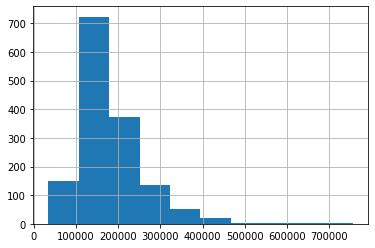

In [45]:
data_y.hist()

**由上图可以发现， 标签并不符合标准正态分布， 因此， 查看log后的分布情况**

<AxesSubplot:>

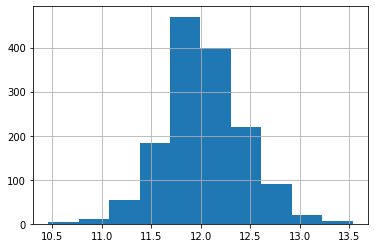

In [46]:
np.log1p(data_y).hist()

## 我们对标签求对数， 使得数据更加平滑

In [50]:
new_data_y = np.log1p(data_y)
new_data_y.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

**注意: 最后求出的结果要使用np.exmp1()进行反向，以便得到最终结果**

## 将处理好的数据存储起来

In [56]:
new_data_all.to_csv('./dataset/new_data_all.csv')
data_train_new.to_csv('./dataset/data_train.csv')
data_test_new.to_csv('./dataset/data_test.csv')
data_y.to_csv('./dataset/data_y.csv')
new_data_y.to_csv('./dataset/new_data_y.csv')

# 分离训练集和测试集， 并选择模型
> 先使用默认参数进行训练，已选择比较适合的模型

In [2]:
data_train_new = pd.read_csv('./dataset/data_train.csv', index_col=0)
data_test_new = pd.read_csv('./dataset/data_test.csv', index_col=0)
new_data_y = pd.read_csv('./dataset/new_data_y.csv', index_col=0)

data_train_new.shape, data_test_new.shape, new_data_y.shape

((1460, 302), (1459, 302), (1460, 1))

## 分离训练集和测试集

In [3]:
# 将标签转化为以为np.ndarray
new_y = np.array(new_data_y).reshape(-1)
new_y

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_train_new, np.array(new_data_y), random_state=3, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1022, 302), (438, 302), (1022, 1), (438, 1))

## 使用多种模型进行训练

### 使用线性回归进行训练

In [5]:
from sklearn import metrics

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [62]:
lr_predict = lr.predict(X_test)
metrics.mean_squared_error(Y_test, lr_predict)

8.364472188778174e+18

**可以发现， 线性回归的效果非常差（数据很复杂，线性回归效果差很正常）**

## 使用决策树进行回归分析

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [64]:
tree_predict = tree.predict(X_test)
metrics.mean_squared_error(Y_test, tree_predict)

0.04705746019305187

## 使用knn

In [65]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [66]:
knn_predict = knn.predict(X_test)
metrics.mean_squared_error(Y_test, knn_predict)

0.02788990836644524

## 使用SVM

In [67]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [68]:
svm_predict = svm.predict(X_test)
metrics.mean_squared_error(Y_test, svm_predict)

0.015132218665297167

## 使用随机森林

In [69]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()
rft.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [70]:
rft_predict = rft.predict(X_test)
metrics.mean_squared_error(Y_test, rft_predict)

0.01824299050794413

## GBDT

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

GBDT = GradientBoostingRegressor()
GBDT.fit(X_train, Y_train)

d:\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [72]:
GBDT_predict = GBDT.predict(X_test)
metrics.mean_squared_error(Y_test, GBDT_predict)

0.015521394722331504

## XGBoost

In [6]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
xgb_predict = xgb.predict(X_test)
metrics.mean_squared_error(Y_test, xgb_predict)

0.0184242856158505

### 使用神经网络

In [75]:
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [76]:
# 分离训练集和验证集
X_train_2, X_valid, Y_train_2, Y_valid = train_test_split(X_train, Y_train, random_state=3, test_size=0.2)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(input_dim=302, activation='sigmoid', units=80))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(activation='selu', units=50))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(activation='selu', units=20))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(activation='selu', units=20))
model.add(keras.layers.Dense(activation='linear', units=1))

model.compile(loss='mse', optimizer='Adam')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                24240     
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
__________________________________________

In [78]:
history = model.fit(X_train_2, Y_train_2, validation_data=(X_valid, Y_valid), epochs=200, batch_size=20)

Train on 817 samples, validate on 205 samples
Epoch 1/200
817/817 [==============================] - 1s 712us/sample - loss: 135.5743 - val_loss: 131.5515
Epoch 2/200
817/817 [==============================] - 0s 121us/sample - loss: 105.4374 - val_loss: 80.0538
Epoch 3/200
817/817 [==============================] - 0s 108us/sample - loss: 61.3665 - val_loss: 18.4779
Epoch 4/200
817/817 [==============================] - 0s 117us/sample - loss: 22.0309 - val_loss: 5.4156
Epoch 5/200
817/817 [==============================] - 0s 110us/sample - loss: 8.8433 - val_loss: 1.4905
Epoch 6/200
817/817 [==============================] - 0s 105us/sample - loss: 4.0722 - val_loss: 0.7333
Epoch 7/200
817/817 [==============================] - 0s 102us/sample - loss: 2.8972 - val_loss: 0.6971
Epoch 8/200
817/817 [==============================] - 0s 113us/sample - loss: 2.3066 - val_loss: 0.4163
Epoch 9/200
817/817 [==============================] - 0s 104us/sample - loss: 1.8531 - val_loss: 0.3935

Epoch 78/200
817/817 [==============================] - 0s 102us/sample - loss: 0.1347 - val_loss: 0.0405
Epoch 79/200
817/817 [==============================] - 0s 102us/sample - loss: 0.1142 - val_loss: 0.0476
Epoch 80/200
817/817 [==============================] - 0s 97us/sample - loss: 0.1229 - val_loss: 0.0493
Epoch 81/200
817/817 [==============================] - 0s 104us/sample - loss: 0.1112 - val_loss: 0.0529
Epoch 82/200
817/817 [==============================] - 0s 108us/sample - loss: 0.1268 - val_loss: 0.0581
Epoch 83/200
817/817 [==============================] - 0s 103us/sample - loss: 0.0884 - val_loss: 0.0655
Epoch 84/200
817/817 [==============================] - 0s 97us/sample - loss: 0.1183 - val_loss: 0.1077
Epoch 85/200
817/817 [==============================] - 0s 104us/sample - loss: 0.1056 - val_loss: 0.0333
Epoch 86/200
817/817 [==============================] - 0s 95us/sample - loss: 0.1221 - val_loss: 0.0462
Epoch 87/200
817/817 [===========================

<AxesSubplot:>

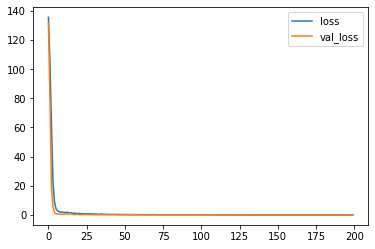

In [79]:
pd.DataFrame(history.history).plot()

In [80]:
dnn_predict = model.predict(X_test)
metrics.mean_squared_error(Y_test, dnn_predict)

0.027767584907883273

**由于模型的效果相差不打， 因此我们选用xgboost**

### 绘制xgboost相关参数的学习曲线

#### 基学习器数量的学习曲线

In [195]:
xgboost_n_train = []
xgboost_n_test = []

In [20]:
def plot_learning(x, train_list, test_list):
    plt.plot(x, train_list, label='train')
    plt.plot(x, test_list, label='test')
    plt.legend()
    plt.show()

In [197]:
for i in range(2, 101):
    xgb_demo = XGBRegressor(n_estimators=i)
    xgboost_n_train.append(model_selection.cross_val_score(xgb_demo, X_train, Y_train, cv=10, scoring='neg_mean_squared_error').mean())
    xgb_demo.fit(X_train, Y_train)
    predict_demo = xgb_demo.predict(X_test)
    xgboost_n_test.append(metrics.mean_squared_error(Y_test, predict_demo))

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

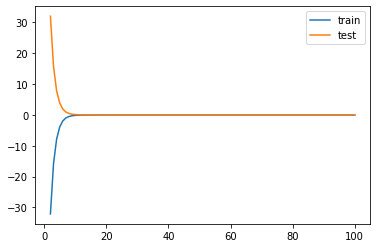

In [199]:
plot_learning([i for i in range(2, 101)], xgboost_n_train, xgboost_n_test)

In [201]:
pd.DataFrame(xgboost_n_test)

,0
0,32.030086
1,15.774104
2,7.778521
3,3.826122
4,1.894719
5,0.946546
6,0.474361
7,0.244339
8,0.131333
9,0.074898


In [202]:
pd.DataFrame(xgboost_n_train)

,0
0,-32.119088
1,-15.824708
2,-7.812295
3,-3.877678
4,-1.931769
5,-0.972451
6,-0.497548
7,-0.263740
8,-0.145021
9,-0.085281


**由学习曲线及相关值可以发现， 训练集从20左右开始基本不变， 测试集从20左右基本不变， 因此我们可以将n的网格搜索范围定在15-25之间**

### 最大深度的学习曲线

In [210]:
xgboost_deep_train = []
xgboost_deep_test = []

for i in range(2, 51):
    xgb_demo = XGBRegressor(max_depth=i, n_jobs=10)
    xgboost_deep_train.append(model_selection.cross_val_score(xgb_demo, X_train, Y_train, cv=10, scoring='neg_mean_squared_error').mean())
    xgb_demo.fit(X_train, Y_train)
    predict_demo = xgb_demo.predict(X_test)
    xgboost_deep_test.append(metrics.mean_squared_error(Y_test, predict_demo))

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif is_categorical(dtype) and enable_categorical:
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:223: FutureWarnin

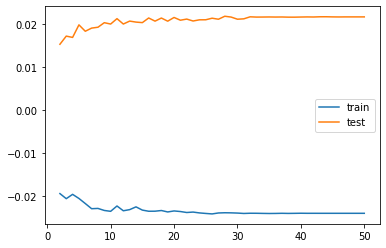

In [211]:
plot_learning([i for i in range(2, 51)], xgboost_deep_train, xgboost_deep_test)

In [212]:
pd.DataFrame(xgboost_deep_train)

,0
0,-0.019416
1,-0.020600
2,-0.019594
3,-0.020553
4,-0.021735
5,-0.022939
6,-0.022873
7,-0.023349
8,-0.023550
9,-0.022307


In [213]:
pd.DataFrame(xgboost_deep_test)

,0
0,0.015391
1,0.017290
2,0.016988
3,0.019915
4,0.018424
5,0.019158
6,0.019361
7,0.020420
8,0.020102
9,0.021361


**由以上数据可以发现， 深度越深， mse越大， 因此我们将网格搜索范围放在2-10之间**

### 使用网格搜索确定参数

In [7]:
from sklearn import model_selection

In [15]:
params = {
    'n_estimators': [i for i in range(15, 33)],
    'max_depth': [i for i in range(2, 11)],
    'reg_alpha': [0.02, 0.1, 1, 10, 100],
    'reg_lambda': [0.02, 0.1, 1, 10, 100]
}

In [16]:
xgb_grid = model_selection.GridSearchCV(XGBRegressor(), params, scoring='neg_mean_squared_error', cv=10)
xgb_grid.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [17]:
xgb_grid.best_params_

{'max_depth': 5, 'n_estimators': 32, 'reg_alpha': 0.02, 'reg_lambda': 1}

In [18]:
xgb_grid.best_score_

-0.021069184891838944

#### 将其他参数不变, 重新绘制n_estimators的学习曲线

In [23]:
xgboost_n_train = []
xgboost_n_test = []

for i in range(1, 51):
    xgb_demo = XGBRegressor(n_estimators=i, max_depth=5, reg_alpha=0.02, reg_lambda=1)
    xgboost_n_train.append(model_selection.cross_val_score(xgb_demo, X_train, Y_train, cv=10, scoring='neg_mean_squared_error').mean())
    xgb_demo.fit(X_train, Y_train)
    predict_demo = xgb_demo.predict(X_test)
    xgboost_n_test.append(metrics.mean_squared_error(Y_test, predict_demo))

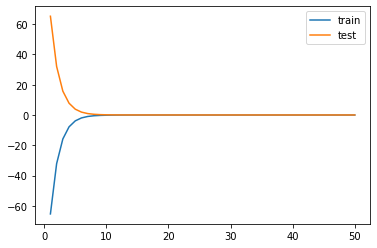

In [24]:
plot_learning([i for i in range(1, 51)], xgboost_n_train, xgboost_n_test)

**可以发现, n_estimators在10左右就趋于稳定, 因此使用15即可**

# 使用XGBoost进行模型训练, 并且预测提交数据进行提交

In [26]:
xgb = XGBRegressor(n_estimators=15, max_depth=5, reg_alpha=0.02, reg_lambda=1)
xgb.fit(data_train_new, new_data_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=15, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.02, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
predict = xgb.predict(data_test_new)

In [30]:
predict = pd.DataFrame(predict, columns=['SalePrice'])
predict.head()

,SalePrice
0,11.667645
1,11.820365
2,12.122431
3,12.151701
4,12.068053


In [35]:
predict.index = data_test_new.index
predict.head()

,SalePrice
Id,
1461,11.667645
1462,11.820365
1463,12.122431
1464,12.151701
1465,12.068053


In [36]:
predict_sub = np.expm1(predict)
predict_sub.head()

,SalePrice
Id,
1461,116732.101562
1462,135992.843750
1463,183951.125000
1464,189415.000000
1465,174215.359375


In [37]:
predict_sub.to_csv('./dataset/xgboost.csv')